<a href="https://colab.research.google.com/github/almartcas/TFG/blob/main/PI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imágenes de persistencia.

En este notebook vamos a utilizar un diagrama de persistencia para construir imágenes de persistencia.

In [ ]:
!pip install PersistenceImages

In [ ]:
import PersistenceImages.persistence_images as pimg
import numpy as np

Primero creamos el objeto de la imagen de persistencia con con los parámetros por defecto, pero con las dimensiones que deseamos. 

In [ ]:
pers_imager = pimg.PersistenceImager(birth_range=(-1, 1.5), pers_range=(-1,1.5))
print(pers_imager)

PersistenceImager object: 
  pixel size: 0.5 
  resolution: (5, 5) 
  birth range: (-1, 1.5) 
  persistence range: (-1, 1.5) 
  weight: linear_ramp 
  kernel: bvncdf 
  weight parameters: {} 
  kernel parameters: {sigma: [[1. 0.]
 [0. 1.]]}


A continuación, generamos la imagen de persistencia con la información del diagrama de persistencia que hemos utilizado anteriormente.

In [ ]:
pers_dgm = np.array([[0.        , 0.16763055],
        [0.        , 0.18681541],
        [0.        , 0.25961509],
        [0.        , 0.35846898],
        [0.        , 0.3667424 ],
        [0.        , 0.39319205],
        [0.        , 0.40496913]])
pers_img = pers_imager.transform(pers_dgm, skew=True)

En la primera imagen se muestran los puntos del diagrama de persistencia sobre la cuadrícula que hemos creado al principio, en la segunda imagen ya se ha añadido la información a cada pixel para construir la imagen de persistencia.






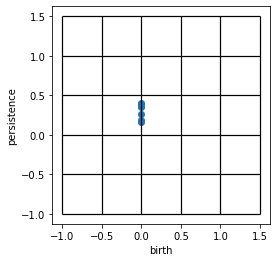

In [ ]:
pers_imager.plot_diagram(pers_dgm, skew=True)

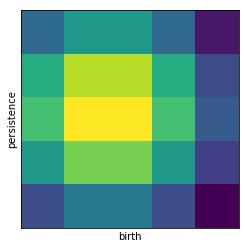

In [ ]:
pers_imager.plot_image(pers_dgm, skew=True)

En las siguientes celdas construimos imágenes de persistencia con diferentes resoluciones.

In [ ]:
pers_imager.pixel_size = 1
print(pers_imager)

PersistenceImager object: 
  pixel size: 1 
  resolution: (3, 3) 
  birth range: (-1.25, 1.75) 
  persistence range: (-1.25, 1.75) 
  weight: linear_ramp 
  kernel: bvncdf 
  weight parameters: {} 
  kernel parameters: {sigma: [[1. 0.]
 [0. 1.]]}


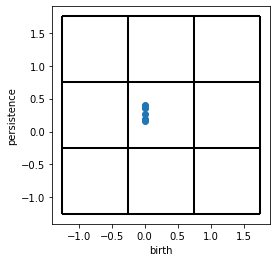

In [ ]:
pers_imager.plot_diagram(pers_dgm, skew=True)

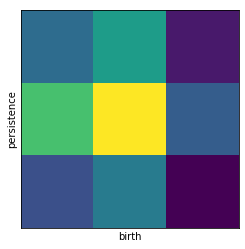

In [ ]:
pers_imager.plot_image(pers_dgm, skew=True)

In [ ]:
pers_imager.pixel_size = 0.03
print(pers_imager)

PersistenceImager object: 
  pixel size: 0.03 
  resolution: (100, 100) 
  birth range: (-1.25, 1.75) 
  persistence range: (-1.25, 1.75) 
  weight: linear_ramp 
  kernel: bvncdf 
  weight parameters: {} 
  kernel parameters: {sigma: [[1. 0.]
 [0. 1.]]}


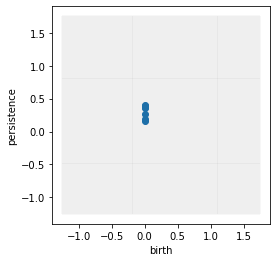

In [ ]:
pers_imager.plot_diagram(pers_dgm, skew=True)

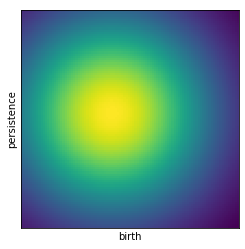

In [ ]:
pers_imager.plot_image(pers_dgm, skew=True)

# Modificar la función de peso

En esta sección vamos a calcular dos imágenes de persistencia en las que se utiliza una función de peso distinta.

In [ ]:
!pip install Cython ripser tadasets

from itertools import product

import time
import numpy as np
from sklearn import datasets
from scipy.stats import multivariate_normal as mvn
import matplotlib.pyplot as plt

from ripser import Rips
from persim import PersistenceImager

from persim.images_weights import linear_ramp


Para poder visualizar bien la diferencia al cambiar los parámetros de la función de peso necesitamos un ejemplo más complejo que el que hemos utilizado hasta ahora. Comenzamos creando un nuevo dataset para trabajar a partir de el.

In [ ]:
pimgr = PersistenceImager(pixel_size=0.2, birth_range=(0,1))
print(pimgr)

PersistenceImager(birth_range=(0.0, 1.0), pers_range=(0.0, 1.0), pixel_size=0.2, weight=persistence, weight_params={'n': 1.0}, kernel=gaussian, kernel_params={'sigma': [[1.0, 0.0], [0.0, 1.0]]})


Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


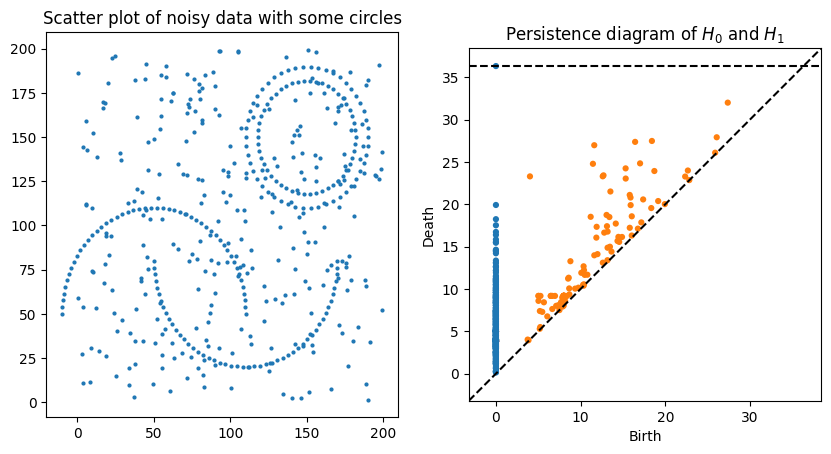

In [ ]:
data = np.concatenate([200 * np.random.random((300,2)),
                       150 + 40 * datasets.make_circles(n_samples=100)[0],
                       50 + 60 * datasets.make_moons(n_samples=100)[0]])

rips = Rips()
dgms = rips.fit_transform(data)
H0_dgm = dgms[0]
H1_dgm = dgms[1]

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.scatter(data[:,0], data[:,1], s=4)
plt.title("Scatter plot of noisy data with some circles")

plt.subplot(122)
rips.plot(dgms, legend=False, show=False)
plt.title("Persistence diagram of $H_0$ and $H_1$")
plt.show()

Calculamos las imágenes de persistencia.

In [ ]:
pimgr = PersistenceImager(pixel_size=0.2)
pimgr.fit(H1_dgm)

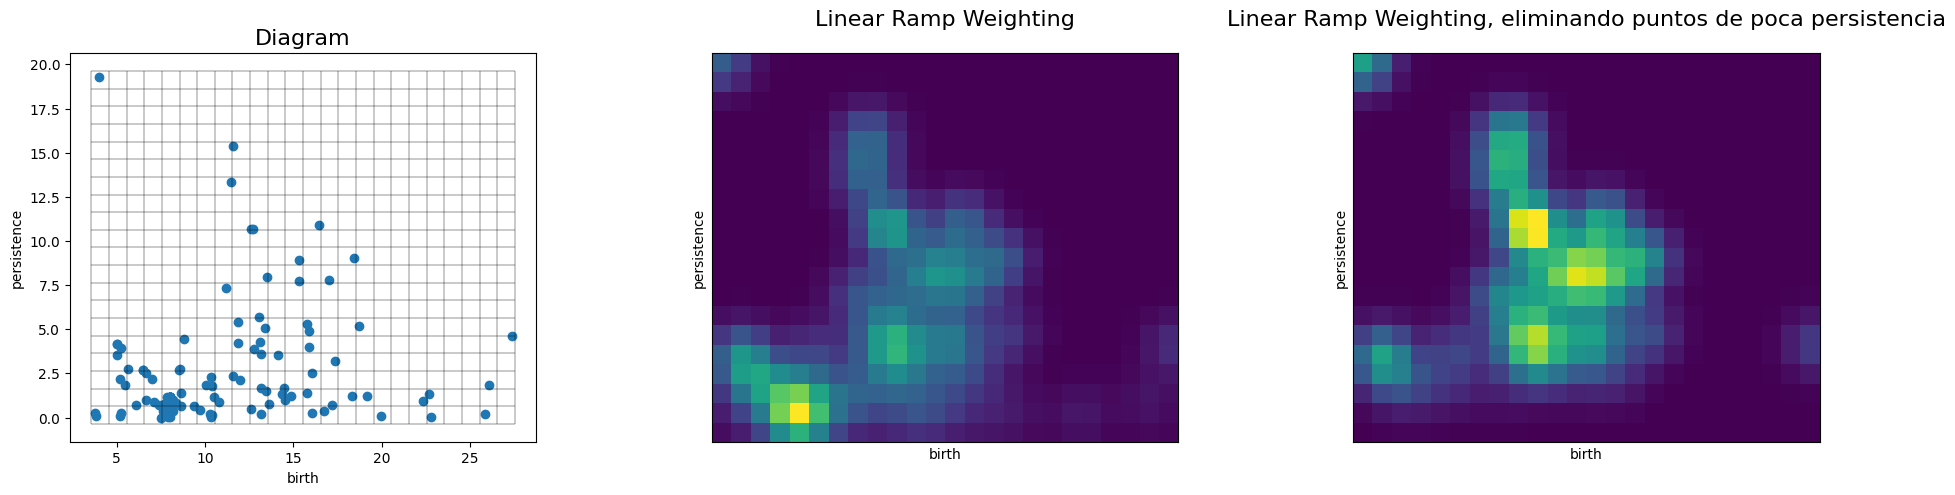

In [ ]:
from persim.images_weights import linear_ramp

pimgr.pixel_size = 1
pimgr.weight = linear_ramp
pimgr.weight_params = {'low':0.0, 'high':1.0, 'start':0.0, 'end':10.0}

fig, axs = plt.subplots(1, 3, figsize=(20,5))
pimgr.plot_diagram(H1_dgm, skew=True, ax=axs[0])
axs[0].set_title('Diagram', fontsize=16)

pimgr.plot_image(pimgr.transform(H1_dgm), ax=axs[1])
axs[1].set_title('Linear Ramp Weighting', fontsize=16)

pimgr.weight_params = {'low':0.0, 'high':1.0, 'start':2.0, 'end':10.0}
pimgr.plot_image(pimgr.transform(H1_dgm), ax=axs[2])
axs[2].set_title('Linear Ramp Weighting, eliminando puntos de poca persistencia', fontsize=16)

plt.tight_layout()

# Modificando los parámetros de la función de distribución 

En esta sección se va a modificar el valor de la varianza en la distribución Gaussiana para observar como infuye este cambio en el resultado de la imagen de persistencia final.

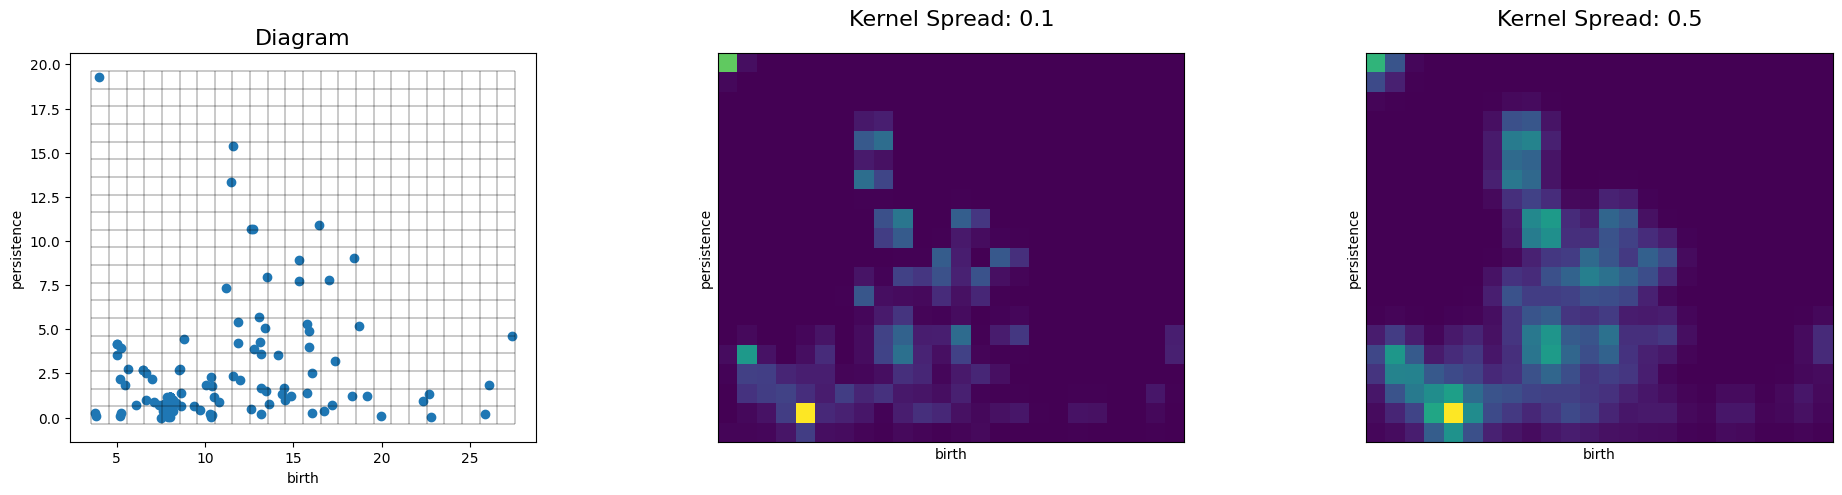

In [ ]:
pimgr = PersistenceImager(pixel_size=1)
pimgr.fit(H1_dgm)

fig, axs = plt.subplots(1, 3, figsize=(20,5))
pimgr.kernel_params = {'sigma': .1}
pimgr.plot_diagram(H1_dgm, skew=True, ax=axs[0])
axs[0].set_title('Diagram', fontsize=16)

pimgr.kernel_params = {'sigma': 0.1}
pimgr.plot_image(pimgr.transform(H1_dgm), ax=axs[1])
axs[1].set_title('Kernel Spread: 0.1', fontsize=16)

pimgr.kernel_params = {'sigma': 0.5}
pimgr.plot_image(pimgr.transform(H1_dgm), ax=axs[2])
axs[2].set_title('Kernel Spread: 0.5', fontsize=16)

plt.tight_layout()